In [140]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
#create an engine using the "Hawaii.sqllite" database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine,reflect = True)

In [14]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

records_count = session.query(Measurement.date,Measurement.prcp).count()
print(records_count)
for row in session.query(Measurement.date,Measurement.prcp).limit(20).all():
    print(row)

19550
('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)


# Exploratory Climate Analysis

2016-08-23
                  Date  Precipation
Date                               
2016-08-23  2016-08-23         0.00
2016-08-23  2016-08-23          NaN
2016-08-23  2016-08-23         1.79
2016-08-23  2016-08-23         0.05
2016-08-23  2016-08-23         0.15
2016-08-23  2016-08-23         0.70
2016-08-23  2016-08-23         0.02
2016-08-24  2016-08-24         0.08
2016-08-24  2016-08-24         2.15
2016-08-24  2016-08-24         2.28
      Date  Precipation
2016-08-23         0.00
2016-08-23          NaN
2016-08-23         1.79
2016-08-23         0.05
2016-08-23         0.15
2016-08-23         0.70
2016-08-23         0.02
2016-08-24         0.08
2016-08-24         2.15
2016-08-24         2.28


<AxesSubplot:xlabel='Date', ylabel='Precipation'>

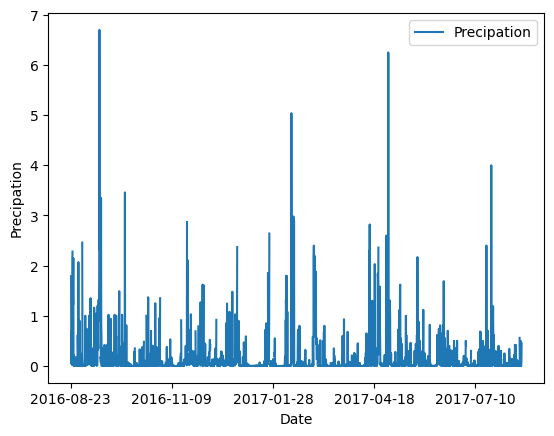

In [98]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days= 365)
print(prev_year)
# Calculate the date one year from the last date in data set.

precipation_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

precipation_results_df = pd.DataFrame(precipation_results, columns=['Date','Precipation'] )
# Sort the dataframe by date

precipation_results_df =precipation_results_df.set_index(precipation_results_df['Date'],inplace=False)

precipation_results_df = precipation_results_df.sort_index()
print(precipation_results_df.head(10))
print((precipation_results_df.head(10).to_string(index=False)))
# Use Pandas Plotting with Matplotlib to plot the data
precipation_results_df.plot(ylabel = 'Precipation')

In [100]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipation_results_df.describe()

,Precipation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [114]:
# How many stations are available in this dataset?
Stations_results = session.query(Station.station).all()
Stations_count = session.query(func.count(Station.station)).all()
print(Stations_results)
print(Stations_count)

[('USC00519397',), ('USC00513117',), ('USC00514830',), ('USC00517948',), ('USC00518838',), ('USC00519523',), ('USC00519281',), ('USC00511918',), ('USC00516128',)]
[(9,)]


In [132]:
# What are the most active stations?
most_active_stations =session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
# List the stations and the counts in descending order.
most_active_stations.all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [134]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

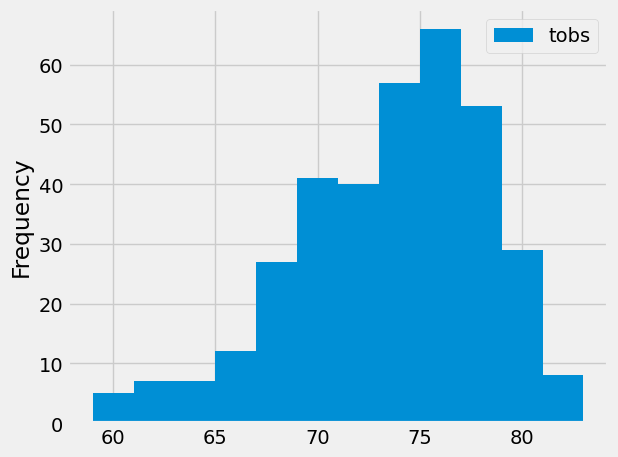

In [152]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns=['tobs'])
df.head(20)


df.plot.hist(bins=12)
plt.tight_layout()

In [176]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
from datetime import datetime 
start_date = input(f"Enter the start date: YYYY-mm-dd : ")
end_date = input(f"Enter the enddate: YYYY-mm-dd : ")
# start_date_fmt = datetime.strptime(start_date, '%Y-%m-%d')
# end_date_fmt = datetime.strptime(end_date,'%Y-%m-%d')



Enter the start date: YYYY-mm-dd : 2016-09-09
Enter the enddate: YYYY-mm-dd : 2017-09-09


In [184]:
Measurement.__table__.columns.values()

def calc_temps(start,end):

    # Query to return the results between the start and end date.
    results = session.query(Measurement.tobs).where((Measurement.date >= start_date) & (Measurement.date <= end_date)).all()
    df = pd.DataFrame(results , columns=['Temperature'])
    
    return df.agg(['min','max','mean'])

In [185]:
calc_temps_df = calc_temps(start_date,end_date)
calc_temps_df

,Temperature
min,58.000000
max,87.000000
mean,74.414037


# Challenge

In [192]:
import app

print("example __name__ = %s", __name__)

if __name__ == "__main__":
    print("example is being run directly.")
else:
    print("example is being imported")


example __name__ = %s __main__
example is being run directly.
